In [1]:
import pandas as pd
import numpy as np

from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_excel("data/data_final.xlsx", engine="openpyxl", index_col="date")

In [6]:
cat_features = ["DTPType", "lightConditions", "weatherConditions", "region", "safety_belt", "pokritie", "traffic_regime", "additionalFactor", "placeConditions", "closeObjects"]
drop_features = ["privod", "coordL", "coordW", "street", "road", "Suburb", "#", "neispravnosti", "alco", "NPatricipants", "NFatal", "NInjured", "NVehicles", "violations", "violationsAdditional"]

In [7]:
df["poln_privod"] = df["privod"].apply(lambda x: round(sum([y.count("полноприводные") for y in str(x).lower().split(";")]) / len(str(x).split(";")), 2))
df["pere_privod"] = df["privod"].apply(lambda x: round(sum([y.count("передним") for y in str(x).lower().split(";")]) / len(str(x).split(";")), 2))
df["zadn_privod"] = df["privod"].apply(lambda x: round(sum([y.count("задним") for y in str(x).lower().split(";")]) / len(str(x).split(";")), 2))

df["has_cameras"] = df["camera_count"].apply(lambda x: int(x > 0))

df["has_neispravnosti"] = df["neispravnosti"].apply(lambda x: 1. - round(sum([y.count("технические неисправности отсутствуют") for y in str(x).lower().split(";")]) / len(str(x).split(";")), 2))

In [8]:
df.index = pd.to_datetime(df.index)

In [9]:
for feature in cat_features:
    df[feature].replace({j: i for i, j in enumerate(df[feature].unique())}, inplace=True)

In [10]:
df_train, df_test = train_test_split(df, train_size=.85, random_state=42)

In [11]:
automl = TabularAutoML(task=Task(name='reg', metric=lambda y_true, y_pred: mean_squared_error(y_true, y_pred)))

In [12]:
# oof_pred = automl.fit_predict(df_train, roles = {'target': 'severity of the accident', 'drop': drop_features})

In [13]:
# test_pred = automl.predict(df_test.drop(["severity of the accident"], axis=1, inplace=False))

In [14]:
# pd.DataFrame({'data': df_test.index, 'severity of the accident': [x[0] for x in test_pred.data]}).to_csv('data/pred.csv', index=False)

In [15]:
RD = ReportDeco(output_path='tabularAutoML_model_report')
automl_rd = RD(automl)

In [16]:
rd_pred = automl_rd.fit_predict(df_train, roles={'target': 'severity of the accident', 'drop': drop_features})

In [ ]:
rd_test_pred = automl_rd.predict(df_test)

In [ ]:
mean_squared_error()

,Feature,Importance
0,pere_privod,141.423596
1,safety_belt,75.899464
2,placeConditions,72.794929
3,additionalFactor,67.739457
4,closeObjects,62.811280
5,region,60.332767
6,poln_privod,40.667998
7,zadn_privod,36.344131
8,camera_count,32.706465
9,lightConditions,26.583688


<AxesSubplot:xlabel='Feature'>

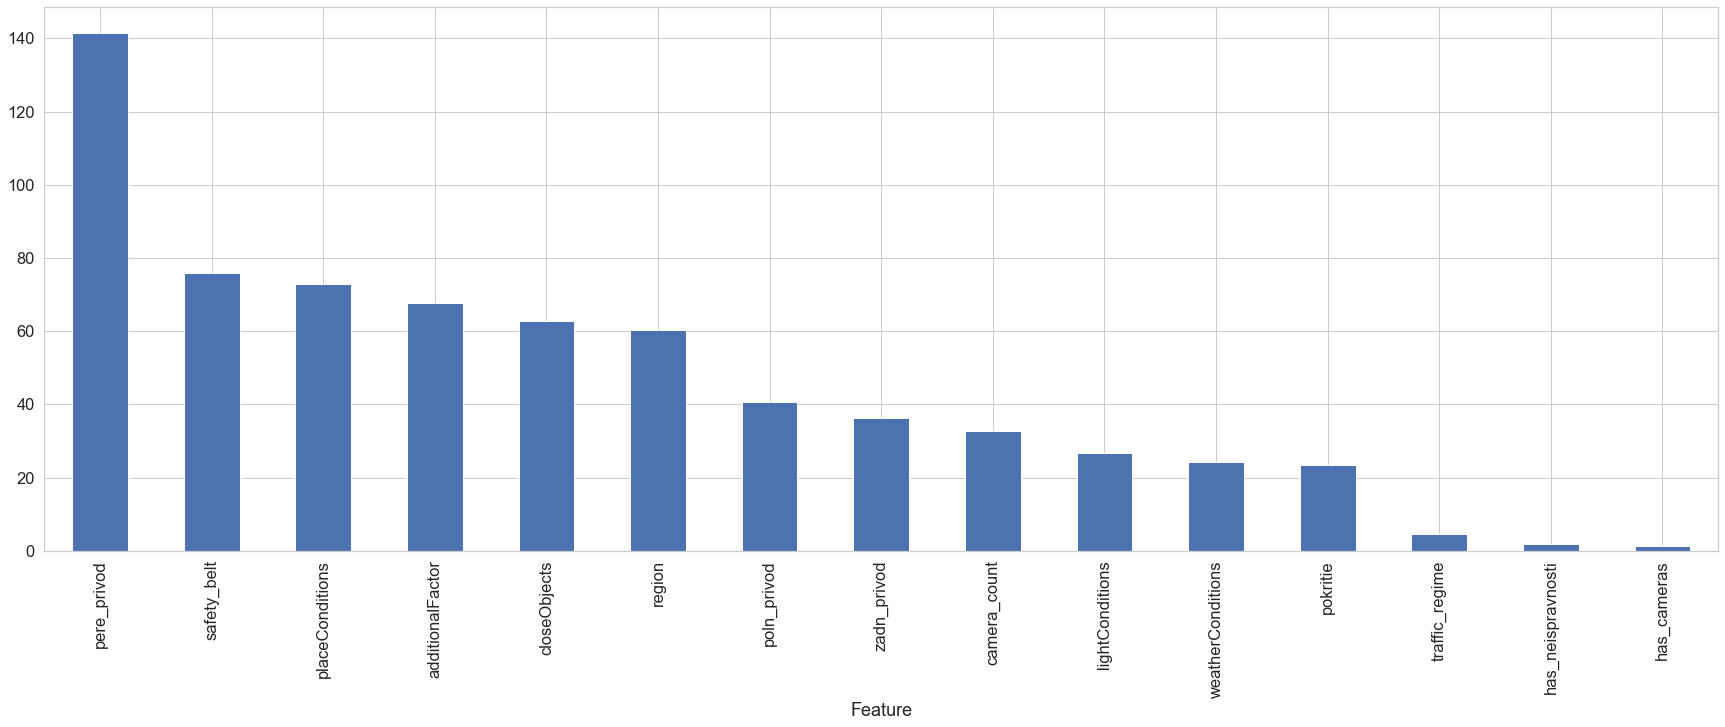

In [ ]:
fi = automl_rd.model.get_feature_scores()
display(fi)
fi.set_index('Feature')['Importance'].plot.bar(figsize=(30, 10), grid=True)